In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import io
%cd "C:\Users\ykkou\Desktop\imarticus\Tutorial Datasets"


C:\Users\ykkou\Desktop\imarticus\Tutorial Datasets


In [3]:
!pip install pyarrow

In [4]:
df = pd.read_parquet('green_tripdata_2023-02.parquet',engine='pyarrow')

In [5]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1,2023-02-01 00:46:22,2023-02-01 01:05:57,N,1.0,74,265,1.0,10.80,42.90,1.0,1.5,0.00,0.0,NaN,1.0,45.40,2.0,1.0,0.00
1,2,2023-02-01 00:05:09,2023-02-01 00:22:42,N,1.0,216,196,1.0,4.76,23.30,1.0,0.5,0.00,0.0,NaN,1.0,25.80,2.0,1.0,0.00
2,2,2023-02-01 00:03:47,2023-02-01 00:27:30,N,1.0,7,114,1.0,6.32,30.30,1.0,0.5,8.89,0.0,NaN,1.0,44.44,1.0,1.0,2.75
3,2,2023-01-31 23:30:56,2023-01-31 23:51:40,N,1.0,74,239,1.0,3.50,16.30,1.0,0.5,0.00,0.0,NaN,1.0,21.55,2.0,1.0,2.75
4,2,2023-02-01 00:15:05,2023-02-01 00:26:02,N,1.0,82,223,1.0,3.14,17.00,1.0,0.5,0.00,0.0,NaN,1.0,19.50,2.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64804,2,2023-02-28 21:49:00,2023-02-28 22:04:00,None,NaN,7,263,NaN,3.83,16.70,0.0,0.0,2.00,0.0,NaN,1.0,22.45,NaN,NaN,NaN
64805,2,2023-02-28 21:05:00,2023-02-28 21:08:00,None,NaN,41,42,NaN,0.67,12.95,0.0,0.0,2.79,0.0,NaN,1.0,16.74,NaN,NaN,NaN
64806,2,2023-02-28 22:42:00,2023-02-28 22:59:00,None,NaN,166,141,NaN,3.91,19.60,0.0,0.0,3.50,0.0,NaN,1.0,26.85,NaN,NaN,NaN
64807,2,2023-02-28 23:21:00,2023-02-28 23:38:00,None,NaN,41,244,NaN,4.54,19.36,0.0,0.0,4.07,0.0,NaN,1.0,24.43,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64809 entries, 0 to 64808
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64809 non-null  int32         
 1   lpep_pickup_datetime   64809 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  64809 non-null  datetime64[ns]
 3   store_and_fwd_flag     59988 non-null  object        
 4   RatecodeID             59988 non-null  float64       
 5   PULocationID           64809 non-null  int32         
 6   DOLocationID           64809 non-null  int32         
 7   passenger_count        59988 non-null  float64       
 8   trip_distance          64809 non-null  float64       
 9   fare_amount            64809 non-null  float64       
 10  extra                  64809 non-null  float64       
 11  mta_tax                64809 non-null  float64       
 12  tip_amount             64809 non-null  float64       
 13  t

In [7]:
df.drop('ehail_fee',axis=1,inplace=True)


In [8]:
df.PULocationID.unique().sum(),df.DOLocationID.unique().sum()

(29740, 33416)

In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [10]:
missing_value_df.sort_values(by = 'percent_missing',ascending=False)

,column_name,percent_missing
trip_type,trip_type,7.446497
congestion_surcharge,congestion_surcharge,7.438782
store_and_fwd_flag,store_and_fwd_flag,7.438782
RatecodeID,RatecodeID,7.438782
payment_type,payment_type,7.438782
passenger_count,passenger_count,7.438782
mta_tax,mta_tax,0.000000
total_amount,total_amount,0.000000
improvement_surcharge,improvement_surcharge,0.000000
tolls_amount,tolls_amount,0.000000


In [11]:
df.trip_type.value_counts(dropna=False)

1.0    58270
NaN     4826
2.0     1713
Name: trip_type, dtype: int64

In [12]:
df.trip_type = df.trip_type.fillna(df.trip_type.value_counts().idxmax())

In [13]:
df.congestion_surcharge.describe()

count    59988.000000
mean         0.733793
std          1.216754
min         -2.750000
25%          0.000000
50%          0.000000
75%          2.750000
max          2.750000
Name: congestion_surcharge, dtype: float64

<AxesSubplot:xlabel='congestion_surcharge', ylabel='Density'>

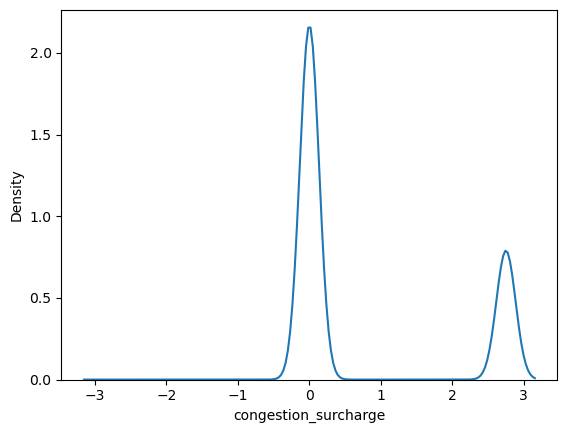

In [14]:
sns.kdeplot(df.congestion_surcharge)

In [15]:
df.congestion_surcharge.skew()

1.0520280316494617

In [16]:
df.congestion_surcharge = df.congestion_surcharge.fillna(df.congestion_surcharge.mean())

In [17]:
df.store_and_fwd_flag.value_counts(dropna=False)

N       59779
None     4821
Y         209
Name: store_and_fwd_flag, dtype: int64

In [18]:
df.store_and_fwd_flag =df.store_and_fwd_flag.fillna(df.store_and_fwd_flag.value_counts().idxmax())

In [19]:
df.payment_type.value_counts(dropna=False)

1.0    38549
2.0    20844
NaN     4821
3.0      481
4.0      114
Name: payment_type, dtype: int64

In [20]:
df.payment_type = df.payment_type.fillna(df.payment_type.value_counts().idxmax())

In [21]:
df.RatecodeID.value_counts(dropna=False)

1.0     57911
NaN      4821
5.0      1828
2.0       154
4.0        51
3.0        38
99.0        5
6.0         1
Name: RatecodeID, dtype: int64

In [22]:
df.RatecodeID = df.RatecodeID.fillna(df.RatecodeID.value_counts().idxmax())

In [23]:
df.passenger_count.value_counts(dropna=False)

1.0    51310
NaN     4821
2.0     4671
5.0     1559
3.0      896
6.0      895
0.0      370
4.0      282
8.0        2
7.0        2
9.0        1
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='passenger_count', ylabel='Density'>

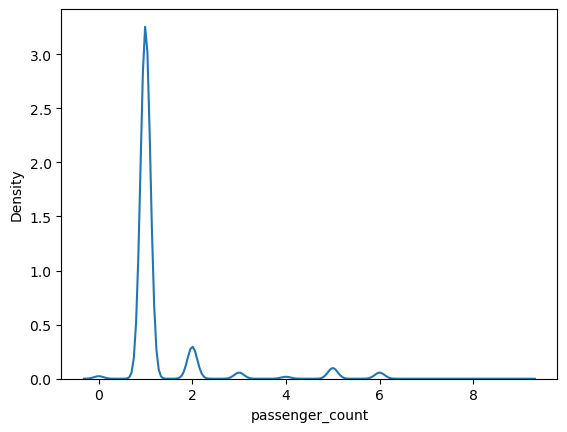

In [24]:
sns.kdeplot(df.passenger_count)

In [25]:
df.passenger_count.skew()

3.631934916426422

In [26]:
df.passenger_count = df.passenger_count.fillna(np.round(df.passenger_count.mean()))

In [27]:
df['Duration'] = df.lpep_dropoff_datetime-df.lpep_pickup_datetime

In [28]:
df.Duration.dtypes

dtype('<m8[ns]')

In [29]:
df.Duration = df.Duration.dt.total_seconds()

In [30]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'Duration'],
      dtype='object')

In [31]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Duration
0,1,2023-02-01 00:46:22,2023-02-01 01:05:57,N,1.0,74,265,1.0,10.80,42.90,1.0,1.5,0.00,0.0,1.0,45.40,2.0,1.0,0.000000,1175.0
1,2,2023-02-01 00:05:09,2023-02-01 00:22:42,N,1.0,216,196,1.0,4.76,23.30,1.0,0.5,0.00,0.0,1.0,25.80,2.0,1.0,0.000000,1053.0
2,2,2023-02-01 00:03:47,2023-02-01 00:27:30,N,1.0,7,114,1.0,6.32,30.30,1.0,0.5,8.89,0.0,1.0,44.44,1.0,1.0,2.750000,1423.0
3,2,2023-01-31 23:30:56,2023-01-31 23:51:40,N,1.0,74,239,1.0,3.50,16.30,1.0,0.5,0.00,0.0,1.0,21.55,2.0,1.0,2.750000,1244.0
4,2,2023-02-01 00:15:05,2023-02-01 00:26:02,N,1.0,82,223,1.0,3.14,17.00,1.0,0.5,0.00,0.0,1.0,19.50,2.0,1.0,0.000000,657.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64804,2,2023-02-28 21:49:00,2023-02-28 22:04:00,N,1.0,7,263,1.0,3.83,16.70,0.0,0.0,2.00,0.0,1.0,22.45,1.0,1.0,0.733793,900.0
64805,2,2023-02-28 21:05:00,2023-02-28 21:08:00,N,1.0,41,42,1.0,0.67,12.95,0.0,0.0,2.79,0.0,1.0,16.74,1.0,1.0,0.733793,180.0
64806,2,2023-02-28 22:42:00,2023-02-28 22:59:00,N,1.0,166,141,1.0,3.91,19.60,0.0,0.0,3.50,0.0,1.0,26.85,1.0,1.0,0.733793,1020.0
64807,2,2023-02-28 23:21:00,2023-02-28 23:38:00,N,1.0,41,244,1.0,4.54,19.36,0.0,0.0,4.07,0.0,1.0,24.43,1.0,1.0,0.733793,1020.0


In [32]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'Duration'],
      dtype='object')

In [33]:
df['hour'] = df.lpep_dropoff_datetime.dt.hour

In [34]:
df['Weekday'] = df.lpep_pickup_datetime.dt.weekday

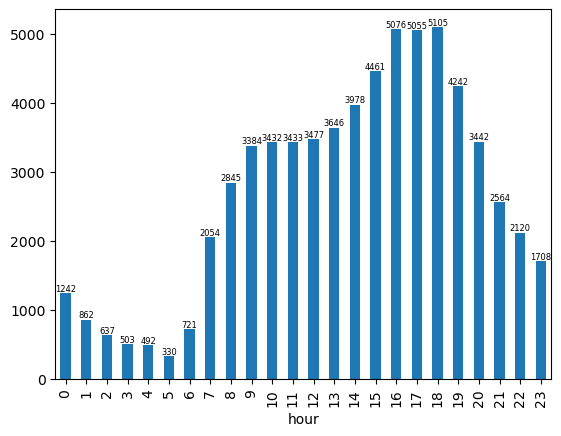

In [35]:
ax = df.VendorID.groupby(df.hour).count().plot(kind= 'bar')
for i in ax.containers:
    ax.bar_label(i,fontsize = 6)

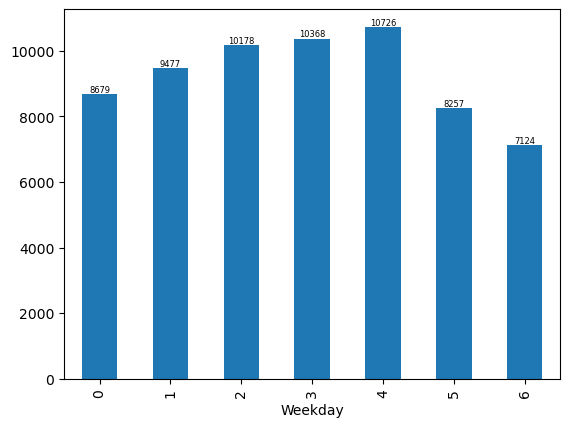

In [36]:
ax = df.total_amount.groupby(df.Weekday).count().plot(kind= 'bar')
for i in ax.containers:
    ax.bar_label(i,fontsize = 6)

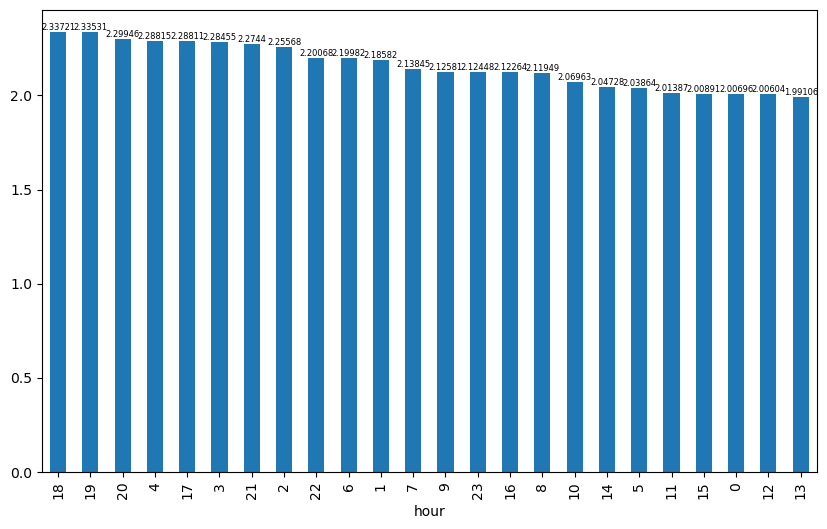

In [37]:
plt.figure(figsize=(10,6))
ax = df.tip_amount.groupby(df.hour).mean().sort_values(ascending=False).plot(kind= 'bar')
for i in ax.containers:
    ax.bar_label(i,fontsize = 6)

In [38]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Duration,hour,Weekday
0,1,2023-02-01 00:46:22,2023-02-01 01:05:57,N,1.0,74,265,1.0,10.80,42.90,...,0.00,0.0,1.0,45.40,2.0,1.0,0.000000,1175.0,1,2
1,2,2023-02-01 00:05:09,2023-02-01 00:22:42,N,1.0,216,196,1.0,4.76,23.30,...,0.00,0.0,1.0,25.80,2.0,1.0,0.000000,1053.0,0,2
2,2,2023-02-01 00:03:47,2023-02-01 00:27:30,N,1.0,7,114,1.0,6.32,30.30,...,8.89,0.0,1.0,44.44,1.0,1.0,2.750000,1423.0,0,2
3,2,2023-01-31 23:30:56,2023-01-31 23:51:40,N,1.0,74,239,1.0,3.50,16.30,...,0.00,0.0,1.0,21.55,2.0,1.0,2.750000,1244.0,23,1
4,2,2023-02-01 00:15:05,2023-02-01 00:26:02,N,1.0,82,223,1.0,3.14,17.00,...,0.00,0.0,1.0,19.50,2.0,1.0,0.000000,657.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64804,2,2023-02-28 21:49:00,2023-02-28 22:04:00,N,1.0,7,263,1.0,3.83,16.70,...,2.00,0.0,1.0,22.45,1.0,1.0,0.733793,900.0,22,1
64805,2,2023-02-28 21:05:00,2023-02-28 21:08:00,N,1.0,41,42,1.0,0.67,12.95,...,2.79,0.0,1.0,16.74,1.0,1.0,0.733793,180.0,21,1
64806,2,2023-02-28 22:42:00,2023-02-28 22:59:00,N,1.0,166,141,1.0,3.91,19.60,...,3.50,0.0,1.0,26.85,1.0,1.0,0.733793,1020.0,22,1
64807,2,2023-02-28 23:21:00,2023-02-28 23:38:00,N,1.0,41,244,1.0,4.54,19.36,...,4.07,0.0,1.0,24.43,1.0,1.0,0.733793,1020.0,23,1


In [39]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'Duration', 'hour',
       'Weekday'],
      dtype='object')

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
df[['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge','congestion_surcharge', 'Duration']] =StandardScaler().fit_transform(df[['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge','congestion_surcharge', 'Duration']])

In [42]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Duration,hour,Weekday
0,1,2023-02-01 00:46:22,2023-02-01 01:05:57,N,1.0,74,265,-0.299231,-0.003110,2.075342,...,-0.756440,-0.157358,0.237099,45.40,2.0,1.0,-0.626844,0.026536,1,2
1,2,2023-02-01 00:05:09,2023-02-01 00:22:42,N,1.0,216,196,-0.299231,-0.009596,0.525973,...,-0.756440,-0.157358,0.237099,25.80,2.0,1.0,-0.626844,-0.002813,0,2
2,2,2023-02-01 00:03:47,2023-02-01 00:27:30,N,1.0,7,114,-0.299231,-0.007920,1.079319,...,2.366866,-0.157358,0.237099,44.44,1.0,1.0,1.722350,0.086197,0,2
3,2,2023-01-31 23:30:56,2023-01-31 23:51:40,N,1.0,74,239,-0.299231,-0.010948,-0.027373,...,-0.756440,-0.157358,0.237099,21.55,2.0,1.0,1.722350,0.043135,23,1
4,2,2023-02-01 00:15:05,2023-02-01 00:26:02,N,1.0,82,223,-0.299231,-0.011335,0.027962,...,-0.756440,-0.157358,0.237099,19.50,2.0,1.0,-0.626844,-0.098078,0,2


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'Duration', 'hour',
       'Weekday'],
      dtype='object')

In [45]:
df[['store_and_fwd_flag', 'RatecodeID','payment_type', 'trip_type','Weekday', 'hour']] = df[['store_and_fwd_flag', 'RatecodeID','payment_type', 'trip_type','Weekday', 'hour']].apply(LabelEncoder().fit_transform)

In [46]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'Duration', 'hour',
       'Weekday'],
      dtype='object')

In [47]:
X = df.drop(['VendorID','lpep_pickup_datetime','lpep_dropoff_datetime','PULocationID','DOLocationID','total_amount','fare_amount'],axis=1)

In [48]:
y = df['total_amount']

<AxesSubplot:xlabel='total_amount', ylabel='Density'>

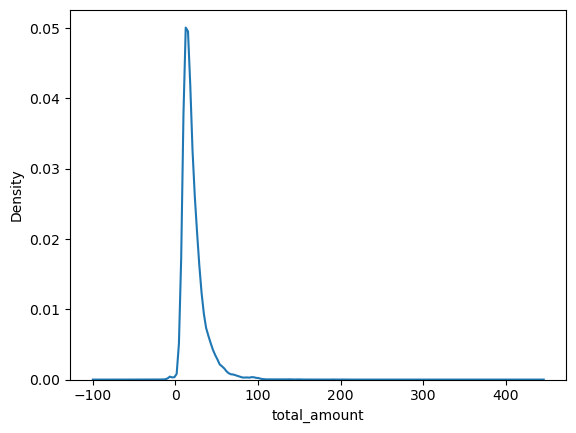

In [49]:
sns.kdeplot(y)

In [144]:
y.skew()

3.6786647751047084

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [55]:
lr = LinearRegression()

In [84]:
dt = DecisionTreeRegressor(max_depth=6)

In [122]:
rf = RandomForestRegressor(n_estimators=1000,max_depth=6)

In [130]:
gb = GradientBoostingRegressor(n_estimators=2000,max_depth=6)

In [59]:
lr_model = lr.fit(X_train,y_train)

In [60]:
lr_model.score(X_train,y_train)

0.4549305091438257

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
np.mean(cross_val_score(lr,X_train,y_train))

0.4531999812866948

In [64]:
lr_pred = lr_model.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
np.sqrt(mean_squared_error(y_test,lr_pred))

10.929524375534923

In [85]:
dt_model = dt.fit(X_train,y_train)

In [86]:
dt_model.score(X_train,y_train)

0.8320158699548026

In [87]:
np.mean(cross_val_score(dt,X_train,y_train))

0.8022116520646716

In [88]:
dt_pred = dt_model.predict(X_test)

In [89]:
np.sqrt(mean_squared_error(y_test,dt_pred))

6.991934580356138

In [125]:
rf_model = rf.fit(X_train,y_train)

In [126]:
rf_model.score(X_train,y_train)

0.8561641613551056

In [127]:
np.mean(cross_val_score(rf,X_train,y_train))

0.8334372839611612

In [128]:
rf_pred = rf_model.predict(X_test)

In [129]:
np.sqrt(mean_squared_error(y_test,rf_pred))

6.615746855239133

In [136]:
gb_model = gb.fit(X_train,y_train)

In [137]:
gb_model.score(X_train,y_train)

0.9943280286091561

In [138]:
gb_pred = gb_model.predict(X_test)

In [139]:
np.sqrt(mean_squared_error(y_test,gb_pred))

5.814754837357235